In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Monte Carlo example: complicated dice rolling
* Roll four dice
* Reroll any ones
* Take the sum of the three largest

We can approximate the theoretical distribution by the distribution of actual events simulated with the Monte Carlo method

	1	2	3	4	6	6
1	0.165	0.167	0.162	0.164	0.170	0.172

2	0.026	0.191	0.190	0.191	0.201	0.202



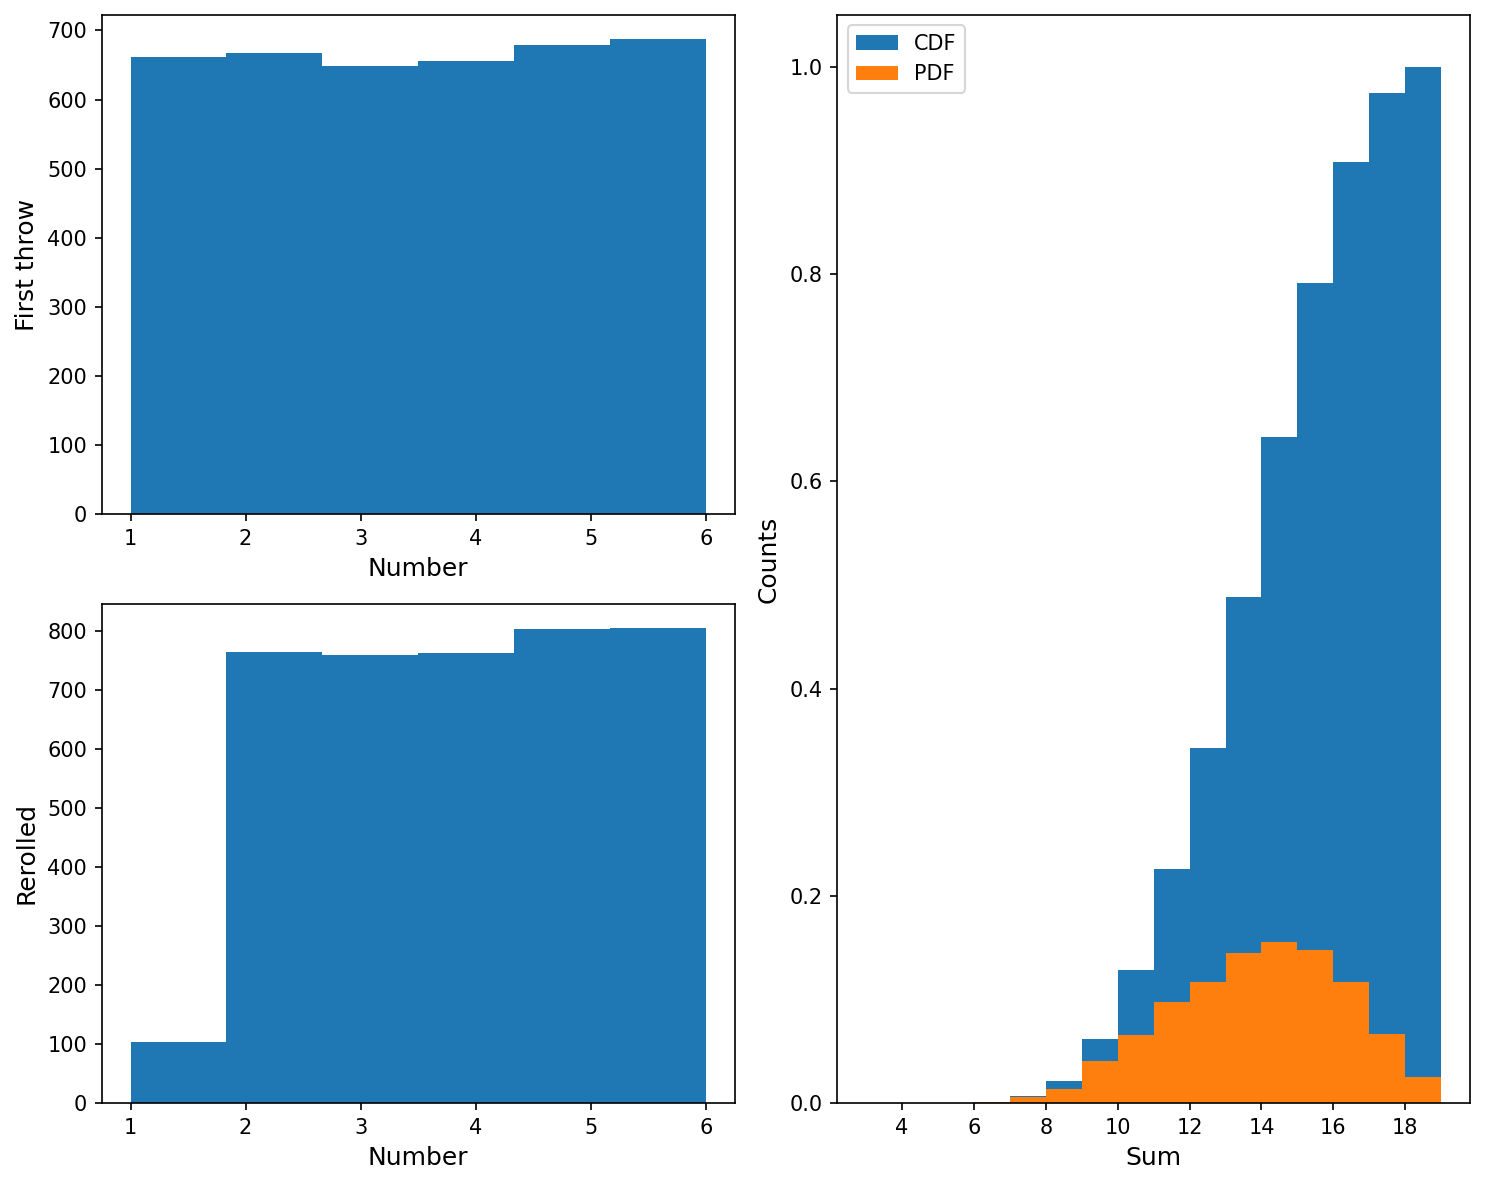

In [119]:
rng = np.random.default_rng()

# sample the potential inputs
samples = 1000 # large numbers of samples are better
total_rolls = samples*4*2 # rolls and potential rerolls for four dice
all_rolls = rng.integers(1, 6, endpoint=True, size=total_rolls) # bounded within [1,6] 

# process the rolls
dice = all_rolls[:total_rolls//2] # take the first half for all of the dice
rerolled = dice.copy() # copy the array so can plot the initial rolls later
for i in range(total_rolls//2):
    if rerolled[i] == 1:
        rerolled[i] = all_rolls[i+total_rolls//2] # use the rerolled value if the first roll was 1
d1 = rerolled[:total_rolls//8] # the first eighth is the first die
d2 = rerolled[total_rolls//8:2*total_rolls//8] # the second eighth is the second die
d3 = rerolled[2*total_rolls//8:3*total_rolls//8] # the third eighth is the third die
d4 = rerolled[3*total_rolls//8:4*total_rolls//8] # the fourth eighth is the last die

# how are the rolls distributed between then and now?
print("\t1\t2\t3\t4\t6\t6")
print("1", end='')
for i in range(1,7):
    print(f'\t{np.count_nonzero(dice==i)/samples/4:.3f}', end='')
print('\n')
print("2", end='')
for i in range(1,7):
    print(f'\t{np.count_nonzero(rerolled==i)/samples/4:.3f}', end='')
print('\n')



# stack the dice so they look like this:
# d11 d12 d13 ... d1n
# d21 d22 d23 ... d2n
# d31 d32 d33 ... d3n
# d41 d42 d43 ... d4n
stack = np.vstack([d1, d2, d3, d4]) 

# then sum each column and subtract the minimum value in that column
s = np.sum(stack, axis=0) - np.min(stack, axis=0)



# plot the initial rolls, the rolls after rerolls, and the eventual sum
fig, ax = plt.subplot_mosaic([['a', 'c'], ['b', 'c']], figsize=(10,8), dpi=150)
ax['a'].hist(dice, bins=6)
ax['b'].hist(rerolled, bins=6)
ax['c'].hist(s, bins=range(3, 20), cumulative=True, density=True)
ax['c'].hist(s, bins=range(3, 20), cumulative=False, density=True)
ax['c'].legend(['CDF', 'PDF'])
ax['a'].set_ylabel('First throw', fontsize=12)
ax['b'].set_ylabel('Rerolled', fontsize=12)
ax['c'].set_xlabel('Sum', fontsize=12)
ax['a'].set_xlabel('Number', fontsize=12)
ax['b'].set_xlabel('Number', fontsize=12)
ax['c'].set_ylabel('Counts', fontsize=12)
fig.tight_layout()
plt.show()

## Outcome
The first rolls are very uniform. Rerolling the ones drastically reduces the number of them in the final count (~1/6 -> ~1/36). The distributions of rolls isn't particularly uniform but the distribution of sums shows a clear tendency towards higher sums. Let's look at the effects of sample sizes on the resulting distribution.

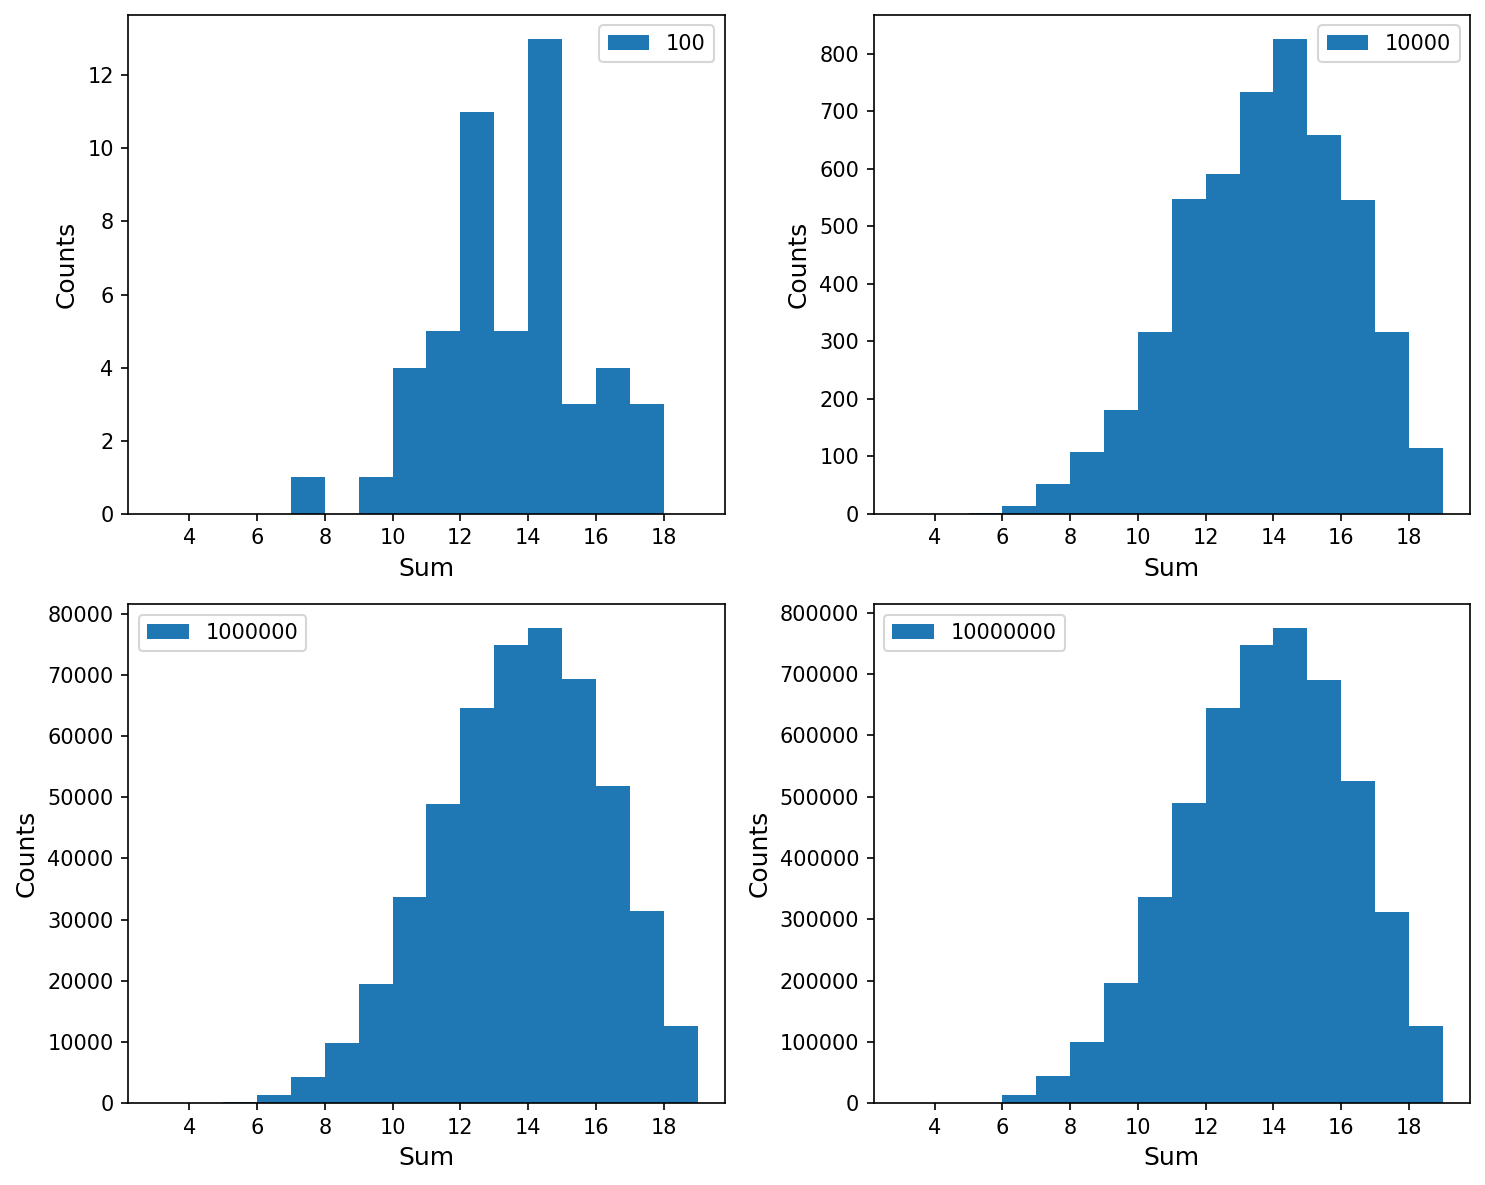

In [111]:
rng = np.random.default_rng()

results = []
sample_nums = [100, 10000, 1000000, 10000000]
for samples in sample_nums:
    total_rolls = samples*4
    all_rolls = rng.integers(1, 6, endpoint=True, size=total_rolls)

    dice = all_rolls[:total_rolls//2]
    rerolled = dice.copy()
    for i in range(total_rolls//2):
        if rerolled[i] == 1:
            rerolled[i] = all_rolls[i+total_rolls//2]
    d1 = rerolled[:+total_rolls//8]
    d2 = rerolled[total_rolls//8:2*total_rolls//8]
    d3 = rerolled[2*total_rolls//8:3*total_rolls//8]
    d4 = rerolled[3*total_rolls//8:4*total_rolls//8]
    stack = np.vstack([d1, d2, d3, d4])
    results.append(np.sum(stack, axis=0) - np.min(stack, axis=0))

fig, ax = plt.subplot_mosaic([['a', 'b'], ['c', 'd']], figsize=(10,8), dpi=150)
names = ['a', 'b', 'c', 'd']
for i in range(4):
    ax[names[i]].hist(results[i], bins=range(3, 20))
    ax[names[i]].set_xlabel('Sum', fontsize=12)
    ax[names[i]].set_ylabel('Counts', fontsize=12)
    ax[names[i]].legend([sample_nums[i]])
fig.tight_layout()
plt.show()

## Result
We can see that a small sample size does not lead to a good distribution and that larger sample sizes converge. This is related to both the 'law of large numbers' and the 'central limit theorem' from probability theory and statistics. In complicated problems or statistics for small subsets of a larger population, convergence will take longer.

However, low sample sizes don't lack utility. Even at 100 samples we can see a clear bias towards 12-14. 10000 samples still give a good idea of the shape and may be 'good enough' for some purposes. 1000000 and 10000000 lead to very similar distributions, indicating that we've likely come pretty close to the real distribution. In that case, why sample 10x as much, taking 10x as long, for limited gain? 

Simple: for higher accuracy. Convergence behaves as $\sqrt{n}$ so a larger sample size will give lower error, but the error decreases less and less for higher $n$.